# <a id='home'>Table of Contents</a>

<a href='#section1'>1. Data Processing</a>

<a href='#section2'>2. Data Analysis and Visualization</a>

<a href='#section3'>3. Connecting to SQL</a>

<a href='#section4'>4. Data Analysis Using SQL</a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.markers as markers
from datetime import datetime as dt
import os
#pd.set_option('display.max_rows', 1000)

## <a id='section1'>1. Data Processing</a>

<a href='#home'>Home</a>

In [2]:
# Create dataframe from CSV
# parse_dates argument automatically converts data to datetime64

df = pd.read_csv(os.path.abspath('amazon_purchases.csv'), parse_dates=['Order Date', 'Shipment Date'])
df.head()

,Order ID,Order Date,Category,Website,Condition,Seller,List Price Per Unit,Purchase Price Per Unit,Quantity,Shipment Date,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total
0,1,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$29.99,$19.79,1,2008-02-25,USPS,$19.79,$0.00,$19.79
1,2,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$27.95,$18.45,1,2008-02-25,USPS,$18.45,$0.00,$18.45
2,3,2008-06-03,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$34.99,$23.09,1,2008-06-04,UPS,$23.09,$0.00,$23.09
3,4,2008-11-06,BEAUTY,Amazon.com,NaN,SimplyBeautiful,$6.99,$9.39,1,2008-11-07,USPS,$9.39,$0.00,$9.39
4,5,2008-11-06,HAIR_STYLING_AGENT,Amazon.com,NaN,SimplyBeautiful,$10.99,$7.99,1,2008-11-07,USPS,$7.99,$0.00,$7.99


In [3]:
# The dataframe has 978 rows and 14 columns

df.shape

(978, 14)

In [4]:
# Prices are strings so they must be changed to floats.
# Note how dates were changed due to using parse_dates when reading CSV.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Order ID                        978 non-null    int64         
 1   Order Date                      978 non-null    datetime64[ns]
 2   Category                        896 non-null    object        
 3   Website                         978 non-null    object        
 4   Condition                       956 non-null    object        
 5   Seller                          966 non-null    object        
 6   List Price Per Unit             978 non-null    object        
 7   Purchase Price Per Unit         978 non-null    object        
 8   Quantity                        978 non-null    int64         
 9   Shipment Date                   967 non-null    datetime64[ns]
 10  Carrier Name & Tracking Number  954 non-null    object        
 11  Item S

In [5]:
# Rename columns to remove spaces.
df.columns = df.columns.str.replace(' ', '')

# Rename specific columns.
df = df.rename(columns={'CarrierName&TrackingNumber':'Carrier', 'ItemSubtotalTax': 'Tax', 
                                  'ShipmentDate':'ShipDate'})
df.head()

,OrderID,OrderDate,Category,Website,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal
0,1,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$29.99,$19.79,1,2008-02-25,USPS,$19.79,$0.00,$19.79
1,2,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$27.95,$18.45,1,2008-02-25,USPS,$18.45,$0.00,$18.45
2,3,2008-06-03,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$34.99,$23.09,1,2008-06-04,UPS,$23.09,$0.00,$23.09
3,4,2008-11-06,BEAUTY,Amazon.com,NaN,SimplyBeautiful,$6.99,$9.39,1,2008-11-07,USPS,$9.39,$0.00,$9.39
4,5,2008-11-06,HAIR_STYLING_AGENT,Amazon.com,NaN,SimplyBeautiful,$10.99,$7.99,1,2008-11-07,USPS,$7.99,$0.00,$7.99


In [6]:
# Drop Website column

del df['Website']

In [7]:
# Replace NaN

df.Category.fillna('unknown', inplace = True)
df.Condition.fillna('unknown', inplace = True)
df.Carrier.fillna('unknown', inplace = True)

In [8]:
# Remove $ and , from price columns.

df['ListPricePerUnit'] = df['ListPricePerUnit'].str.replace('$','').str.replace(',','')
df['PurchasePricePerUnit'] = df['PurchasePricePerUnit'].str.replace('$','').str.replace(',','')
df['ItemSubtotal'] = df['ItemSubtotal'].str.replace('$','').str.replace(',','')
df['Tax'] = df['Tax'].str.replace('$','').str.replace(',','')
df['ItemTotal'] = df['ItemTotal'].str.replace('$','').str.replace(',','')

In [9]:
# Convert price columns to float.

df['ListPricePerUnit'] = df['ListPricePerUnit'].astype(float)
df['PurchasePricePerUnit'] = df['PurchasePricePerUnit'].astype(float)
df['ItemSubtotal'] = df['ItemSubtotal'].astype(float)
df['Tax'] = df['Tax'].astype(float)
df['ItemTotal'] = df['ItemTotal'].astype(float)

In [10]:
# Drop rows with zero prices.

df = df[df.ListPricePerUnit != 0]
df = df[df.PurchasePricePerUnit != 0]
df = df[df.ItemSubtotal != 0]
df = df[df.ItemTotal != 0]

In [11]:
# Previously, we had 978 rows and now we have 783. 

df.shape

(783, 13)

In [12]:
# Change date columns to date objects.
# These commands would be used had we not parsed it dates when reading the csv.
# df_main['OrderDate'] = pd.to_datetime(df_main['OrderDate'])
# df_main['ShipDate'] = pd.to_datetime(df_main['ShipDate'])

In [13]:
df.dtypes

OrderID                          int64
OrderDate               datetime64[ns]
Category                        object
Condition                       object
Seller                          object
ListPricePerUnit               float64
PurchasePricePerUnit           float64
Quantity                         int64
ShipDate                datetime64[ns]
Carrier                         object
ItemSubtotal                   float64
Tax                            float64
ItemTotal                      float64
dtype: object

In [14]:
# Extract year, month, & day and store them in columns in df_main

df['OrderYear'] = df['OrderDate'].dt.year
df['OrderMonth'] = df['OrderDate'].dt.month
df['OrderDay'] = df['OrderDate'].dt.day
df['OrderDayIndex'] = df['OrderDate'].dt.dayofweek
df['OrderDayName'] = df['OrderDate'].dt.day_name()

In [15]:
# Drop rows where year = 2020

#df_main = df_main.drop(df_main[df_main['OrderYear'] == 2020].index)
df = df.drop(df[df['OrderDate'].dt.year == 2020].index)
df.tail()

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay,OrderDayIndex,OrderDayName
969,970,2019-12-14,WIRELESS_ACCESSORY,new,Amazon.com,44.99,21.88,1,2019-12-15,USPS,21.88,1.45,23.33,2019,12,14,5,Saturday
970,971,2019-12-18,CELLULAR_PHONE_CASE,new,MKOAWA,19.99,13.99,1,2019-12-19,AMZN_US,13.99,0.93,14.92,2019,12,18,2,Wednesday
971,972,2019-12-18,CELLULAR_PHONE_CASE,new,TORRAS¬Æ,27.00,12.99,1,2019-12-19,AMZN_US,12.99,0.86,13.85,2019,12,18,2,Wednesday
972,973,2019-12-19,ABIS_GIFT_CARD,new,Amazon.com,50.00,200.00,1,2019-12-19,unknown,200.00,0.00,200.00,2019,12,19,3,Thursday
973,974,2019-12-24,HEALTH_PERSONAL_CARE,new,Amazon.com,24.99,13.59,2,2019-12-26,AMZN_US,27.18,0.00,27.18,2019,12,24,1,Tuesday


In [16]:
# Find unique values in Carrier column
# Note the repitition

df['Carrier'].unique()

array(['USPS', 'UPS', 'FEDEX', 'UPS MI', 'unknown', 'ONTRAC',
       'UPS Mail Innovations', 'Mail Innovations', 'FedEx SmartPost',
       'FedEx', 'OTHER', 'China Post', 'DHL', 'US Postal Service',
       'SMARTPOST', 'LASERSHIP', 'DHL Global Mail', '4PX', 'Royal Mail',
       'Hong Kong Post', 'Other', 'OSM', 'AMZN_US'], dtype=object)

In [17]:
# value_count shows us the frequency

df['Carrier'].value_counts()

USPS                    272
AMZN_US                 200
UPS                     170
ONTRAC                   63
FEDEX                    21
unknown                  12
LASERSHIP                11
DHL Global Mail           8
China Post                4
Mail Innovations          3
SMARTPOST                 2
Other                     2
Royal Mail                2
FedEx SmartPost           2
OTHER                     1
FedEx                     1
UPS MI                    1
DHL                       1
4PX                       1
OSM                       1
Hong Kong Post            1
US Postal Service         1
UPS Mail Innovations      1
Name: Carrier, dtype: int64

In [18]:
# Combine carriers to eliminate repitition

df['Carrier'] = df['Carrier'].replace('FEDEX', 'FedEx')
df['Carrier'] = df['Carrier'].replace('SMARTPOST', 'FedEx SmartPost')
df['Carrier'] = df['Carrier'].replace('Mail Innovations','UPS Mail Innovations')
df['Carrier'] = df['Carrier'].replace('UPS MI','UPS Mail Innovations')
df['Carrier'] = df['Carrier'].replace('US Postal Service','USPS')
df['Carrier'] = df['Carrier'].replace('DHL Global Mail','DHL')
df['Carrier'] = df['Carrier'].replace('US Postal Service','USPS')
df['Carrier'] = df['Carrier'].replace('AMZN_US', 'AMZN')

In [19]:
# We still have far too many carriers so lets set the rest as Other

df['Carrier'].unique()

array(['USPS', 'UPS', 'FedEx', 'UPS Mail Innovations', 'unknown',
       'ONTRAC', 'FedEx SmartPost', 'OTHER', 'China Post', 'DHL',
       'LASERSHIP', '4PX', 'Royal Mail', 'Hong Kong Post', 'Other', 'OSM',
       'AMZN'], dtype=object)

In [20]:
mail = ['USPS', 'UPS', 'UPS Mail Innovations', 'FedEx', 'FedEx SmartPost', 'DHL', 'AMZN']
df.loc[~df.Carrier.isin(mail), 'Carrier'] = 'Other'

In [21]:
df['Category'].unique()

array(['ABIS_BOOK', 'BEAUTY', 'HAIR_STYLING_AGENT', 'unknown',
       'HEALTH_PERSONAL_CARE', 'OUTDOOR_RECREATION_PRODUCT',
       'NETWORKING_DEVICE', 'COMPUTER_DRIVE_OR_STORAGE', 'COMPUTER',
       'BATTERY', 'COMPUTER_COMPONENT', 'MULTIFUNCTION_DEVICE',
       'OUTDOOR_LIVING', 'OFFICE_PRODUCTS', 'CABLE_OR_ADAPTER', 'GROCERY',
       'HOME', 'COMPUTER_INPUT_DEVICE', 'KEYBOARDS', 'COMPUTER_ADD_ON',
       'PERSONAL_CARE_APPLIANCE', 'KITCHEN', 'FLASH_MEMORY',
       'NOTEBOOK_COMPUTER', 'MEMORY_READER', 'AMAZON_BOOK_READER',
       'WIRELESS_ACCESSORY', 'TOOLS', 'PROFESSIONAL_HEALTHCARE',
       'ELECTRONIC_CABLE', 'RAM_MEMORY', 'SEEDS_AND_PLANTS',
       'ABIS_GIFT_CARD', 'INK_OR_TONER', 'SOFTWARE',
       'SURVEILANCE_SYSTEMS', 'SECURITY_CAMERA', 'SCANNER', 'MONITOR',
       'HOME_LIGHTING_ACCESSORY', 'SOCKSHOSIERY', 'SHIRT', 'CAMCORDER',
       'ART_AND_CRAFT_SUPPLY', 'POWER_SUPPLIES_OR_PROTECTION', 'TUNER',
       'CELLULAR_PHONE', 'HARDWARE', 'ABIS_DRUGSTORE', 'HEADPHONES',
     

In [22]:
# We have too many categories.

df['Category'].nunique()

102

In [23]:
# Combine categories
df['Category'] = df['Category'].replace(['NOTEBOOK_COMPUTER','COMPUTER_DRIVE_OR_STORAGE','RAM_MEMORY','TABLET_COMPUTER','MONITOR','COMPUTER_COMPONENT', 'FLASH_MEMORY', 'SOFTWARE', 'INK_OR_TONER', 'COMPUTER_INPUT_DEVICE', 'CABLE_OR_ADAPTER', 'NETWORKING_DEVICE', 'KEYBOARDS', 'COMPUTER_ADD_ON', 'NETWORKING_ROUTER','MEMORY_READER','WIRELESS_ACCESSORY','SCANNER','PRINTER'],'COMPUTER')
df['Category'] = df['Category'].replace(['HEADPHONES','SPEAKERS','BATTERY','MULTIFUNCTION_DEVICE','ELECTRONIC_CABLE','SURVEILANCE_SYSTEMS','SECURITY_CAMERA','WATCH','CONSUMER_ELECTRONICS','CE_ACCESSORY','ELECTRONIC_ADAPTER','ELECTRIC_FAN','CAMCORDER','HANDHELD_OR_PDA','TUNER','AMAZON_BOOK_READER','CELLULAR_PHONE','POWER_SUPPLIES_OR_PROTECTION','CAMERA_OTHER_ACCESSORIES','CHARGING_ADAPTER'],'ELECTRONICS')
df['Category'] = df['Category'].replace(['HAIR_STYLING_AGENT','PERSONAL_CARE_APPLIANCE','PROFESSIONAL_HEALTHCARE','HEALTH_PERSONAL_CARE','SHAMPOO','VITAMIN','ABIS_DRUGSTORE','BEAUTY'],'HEALTH_BEAUTY')
df['Category'] = df['Category'].replace(['KITCHEN','SEEDS_AND_PLANTS','HOME_LIGHTING_ACCESSORY','BOTTLE','OUTDOOR_LIVING','ELECTRIC_FAN','TABLECLOTH','COFFEE_MAKER','HOME_BED_AND_BATH','HOME_LIGHTING_AND_LAMPS','SMALL_HOME_APPLIANCES'],'HOME')
df['Category'] = df['Category'].replace(['SHOES','PANTS','SHIRT','SHORTS','OUTERWEAR','SWEATSHIRT','HAT', 'SOCKSHOSIERY','UNDERWEAR','TECHNICAL_SPORT_SHOE'],'APPAREL')
df['Category'] = df['Category'].replace(['OUTDOOR_RECREATION_PRODUCT','SPORTING_GOODS'],'SPORTS_OUTDOOR')
df['Category'] = df['Category'].replace(['TEA','COFFEE'],'GROCERY')
df['Category'] = df['Category'].replace(['AUTO_PART','HARDWARE','AUTO_ACESSORY','PRECISION_MEASURING','BUILDING_MATERIAL','AUTO_ACCESSORY'],'TOOLS')
df['Category'] = df['Category'].replace(['WRITING_INSTRUMENT','PAPER_PRODUCT','BACKPACK','CARRYING_CASE_OR_BAG','CE_CARRYING_CASE_OR_BAG','OFFICE_PRODUCTS'],'OFFICE')
df['Category'] = df['Category'].replace(['ABIS_DVD','TOYS_AND_GAMES','ABIS_MUSIC','DOWNLOADABLE_VIDEO_GAME','ART_AND_CRAFT_SUPPLY'],'ENTERTAINMENT')
df['Category'] = df['Category'].replace(['ABIS_BOOK'],'BOOKS')
df['Category'] = df['Category'].replace(['ABIS_GIFT_CARD'],'GIFT_CARD')
df['Category'] = df['Category'].replace(['AV_FURNITURE','CELLULAR_PHONE_CASE','PHONE_ACCESSORY','PET_SUPPLIES','ACCESSORY','BAG','ACCESSORY_OR_PART_OR_SUPPLY'],'OTHER')
df['Category'] = df['Category'].replace(['','unknown'],'UNKNOWN')

In [24]:
# Categories have been reduced.

df['Category'].value_counts()

COMPUTER          153
HEALTH_BEAUTY     153
HOME               73
ELECTRONICS        73
UNKNOWN            68
BOOKS              65
APPAREL            54
TOOLS              30
OTHER              29
SPORTS_OUTDOOR     28
OFFICE             21
GROCERY            19
GIFT_CARD          10
ENTERTAINMENT       5
Name: Category, dtype: int64

In [25]:
# The Seller column has too many distinct values.
# The only information we need from here is whether something was sold by Amazon or a 3rd party.

df['Seller'].nunique()

226

In [26]:
# Reduce Sellers

df.loc[~df.Seller.isin(['Amazon.com']), 'Seller'] = 'ThirdParty'
df.loc[df.Seller.isin(['Amazon.com']), 'Seller'] = 'Amazon'
df['Seller'].unique()

array(['Amazon', 'ThirdParty'], dtype=object)

In [27]:
# Final dataframe

df.head()

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay,OrderDayIndex,OrderDayName
0,1,2008-02-19,BOOKS,unknown,Amazon,29.99,19.79,1,2008-02-25,USPS,19.79,0.0,19.79,2008,2,19,1,Tuesday
1,2,2008-02-19,BOOKS,unknown,Amazon,27.95,18.45,1,2008-02-25,USPS,18.45,0.0,18.45,2008,2,19,1,Tuesday
2,3,2008-06-03,BOOKS,unknown,Amazon,34.99,23.09,1,2008-06-04,UPS,23.09,0.0,23.09,2008,6,3,1,Tuesday
3,4,2008-11-06,HEALTH_BEAUTY,unknown,ThirdParty,6.99,9.39,1,2008-11-07,USPS,9.39,0.0,9.39,2008,11,6,3,Thursday
4,5,2008-11-06,HEALTH_BEAUTY,unknown,ThirdParty,10.99,7.99,1,2008-11-07,USPS,7.99,0.0,7.99,2008,11,6,3,Thursday


## <a id='section2'>2. Data Analysis and Visualization</a>

<a href='#home'>Home</a>

In [28]:
# Cumulative total spent from 2008-2019, inclusive

TotalSpent = df['ItemTotal'].sum()
TotalSpent

30357.41

In [29]:
# Total number of transactions

NumTrans = len(df['ItemTotal'])
NumTrans

781

In [30]:
# Average spent

AvgSpent = TotalSpent/NumTrans
AvgSpent

38.86992317541613

In [31]:
# Use groupby to sum purchases by date

df_DateTotal = df[['OrderDate', 'ItemTotal']]
df_DateTotal = df_DateTotal.groupby('OrderDate')
df_DateTotal = df_DateTotal['ItemTotal'].sum()
df_DateTotal

OrderDate
2008-02-19     38.24
2008-06-03     23.09
2008-11-06     29.86
2008-12-13     25.90
2009-07-18     26.97
               ...  
2019-12-13     23.45
2019-12-14     23.33
2019-12-18     28.77
2019-12-19    200.00
2019-12-24     27.18
Name: ItemTotal, Length: 445, dtype: float64

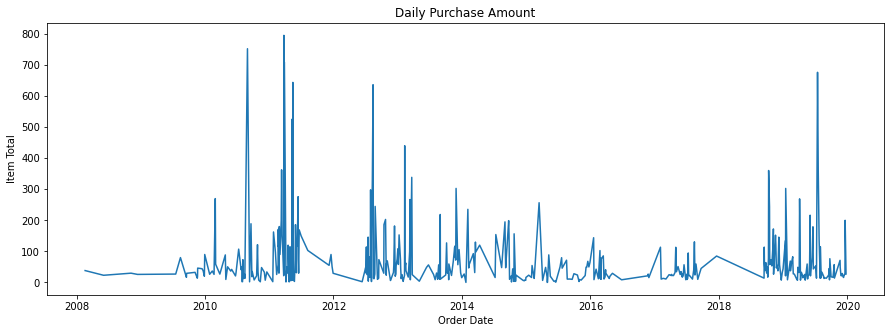

In [45]:
# Plot OrderDate & sum of purchases by date

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_DateTotal.index, df_DateTotal.values)
ax.set_xlabel('Order Date')
ax.set_ylabel('Item Total')
ax.set_title('Daily Purchase Amount')
plt.show()
#ax.figure.savefig('./img/DailyPurchaseAmount.png', bbox_inches='tight', dpi=150)

In [33]:
# Use groupby to sum taxes by date

df_DateTax = df[['OrderDate', 'Tax']]
df_DateTax = df_DateTax.groupby('OrderDate')
df_DateTax = df_DateTax['Tax'].sum()
df_DateTax

OrderDate
2008-02-19    0.00
2008-06-03    0.00
2008-11-06    0.00
2008-12-13    0.00
2009-07-18    0.00
              ... 
2019-12-13    1.46
2019-12-14    1.45
2019-12-18    1.79
2019-12-19    0.00
2019-12-24    0.00
Name: Tax, Length: 445, dtype: float64

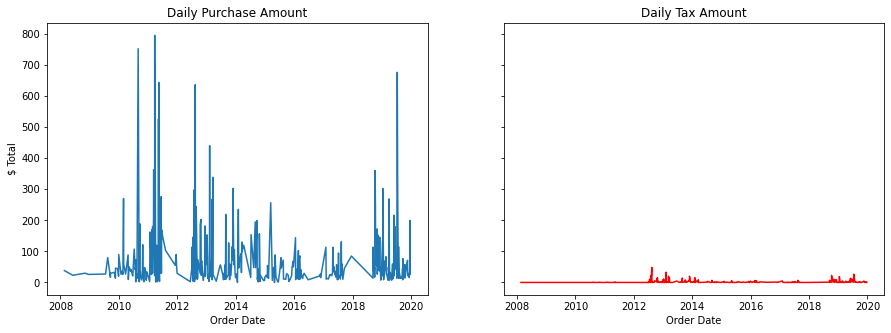

In [48]:
# Plot OrderDate and ItemTotal and OrderDate and Tax

fig,ax = plt.subplots(1,2, sharey = True, figsize=(15,5))

ax[0].plot(df_DateTotal.index, df_DateTotal.values)
ax[1].plot(df_DateTax.index, df_DateTax.values, color = 'r')

ax[0].set_xlabel('Order Date')
ax[0].set_ylabel('$ Total')
ax[1].set_xlabel('Order Date')

ax[0].set_title('Daily Purchase Amount')
ax[1].set_title('Daily Tax Amount')

plt.show()

In [35]:
# The previous graphs contained too much data since they were being plotted for each day. 
# Grouping will allow the information to be more legible.

# Purchases by Year 

df_OrderYear = df[['OrderDate', 'ItemTotal', 'OrderYear']]
df_OrderYear = df_OrderYear.sort_values('OrderDate')
df_OrderYear = df_OrderYear.groupby('OrderYear')
df_OrderYear = df_OrderYear['ItemTotal'].sum()
print(df_OrderYear)

OrderYear
2008     117.09
2009     456.85
2010    2421.77
2011    7176.93
2012    3651.85
2013    3689.19
2014    2075.99
2015    1257.52
2016     823.48
2017    1392.77
2018    2689.12
2019    4604.85
Name: ItemTotal, dtype: float64


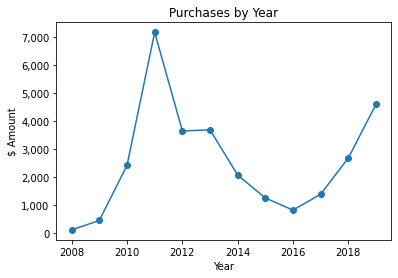

In [42]:
fig,ax = plt.subplots()
ax.plot(df_OrderYear.index, df_OrderYear.values, marker = 'o')
ax.set_title('Purchases by Year')

# x-axis
ax.set_xlabel('Year')


# y-axis
ax.set_ylabel('$ Amount')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: format(int(y), ','))
)

plt.show()

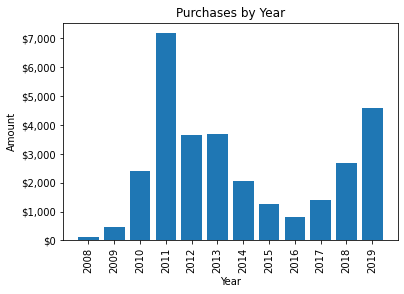

In [44]:
fig,ax = plt.subplots()
ax.bar(df_OrderYear.index, df_OrderYear.values)
ax.set_title('Purchases by Year')

# x-axis
ax.set_xlabel('Year')
plt.xticks([x for x in df_OrderYear.index], rotation = 90)

# y-axis
ax.set_ylabel('Amount')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: '$'+format(int(y), ','))
)

plt.show()
#ax.figure.savefig('./img/PurchasesByYear.png', bbox_inches='tight', dpi=150)

In [38]:
# Purchases by Month

df_OrderMonth = df[['OrderDate', 'ItemTotal', 'OrderMonth']]
df_OrderMonth = df_OrderMonth.sort_values('OrderDate')
df_OrderMonth = df_OrderMonth.groupby('OrderMonth')
df_OrderMonth = df_OrderMonth['ItemTotal'].sum()
df_OrderMonth

OrderMonth
1     1435.93
2     3082.08
3     4439.17
4     1497.22
5     2198.31
6     2042.64
7     3352.54
8     3507.65
9     1887.06
10    2392.95
11    2187.99
12    2333.87
Name: ItemTotal, dtype: float64

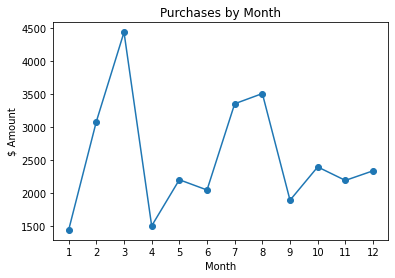

In [39]:
fig, ax = plt.subplots()
ax.plot(df_OrderMonth.index, df_OrderMonth.values, marker = 'o')
ax.set_xlabel('Month')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Month')
plt.xticks([x for x in df_OrderMonth.index])
plt.show()

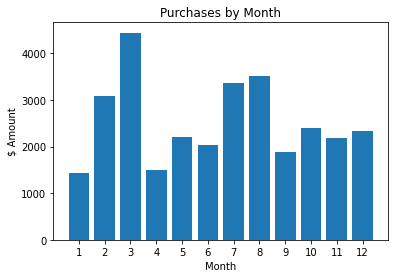

In [40]:
fig, ax = plt.subplots()
ax.bar(df_OrderMonth.index, df_OrderMonth.values)
ax.set_xlabel('Month')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Month')
plt.xticks([x for x in df_OrderMonth.index])
plt.show()
#ax.figure.savefig('./img/PurchasesByMonth.png', bbox_inches='tight', dpi=150)

In [41]:
# Transactions by Year

df_TransYear = df[['OrderDate', 'ItemTotal', 'OrderYear']]
df_TransYear = df_TransYear.groupby('OrderYear')
df_TransYear = df_TransYear['ItemTotal'].size()
df_TransYear

OrderYear
2008      9
2009     15
2010     83
2011     96
2012     96
2013     89
2014     48
2015     59
2016     36
2017     68
2018     69
2019    113
Name: ItemTotal, dtype: int64

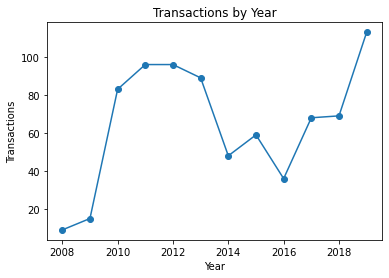

In [42]:
fig,ax = plt.subplots()
ax.plot(df_TransYear.index, df_TransYear.values, marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Transactions')
ax.set_title('Transactions by Year')
plt.show()
#ax.figure.savefig('./img/TransactionsByYear.png', bbox_inches='tight', dpi=150)

In [43]:
# Transactions by Seller

df_TransSeller = df[['Seller']]
df_TransSeller = df_TransSeller.groupby(df_TransSeller['Seller'] == 'Amazon')
df_TransSeller = df_TransSeller.size()
df_TransSeller

Seller
False    329
True     452
dtype: int64

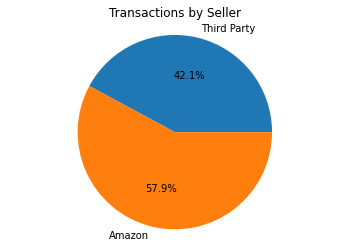

In [44]:
fig,ax = plt.subplots()
ax.pie(df_TransSeller.values, labels = ['Third Party', 'Amazon'], autopct = '%1.1f%%')
ax.set_title('Transactions by Seller')
ax.axis('equal')
plt.show()

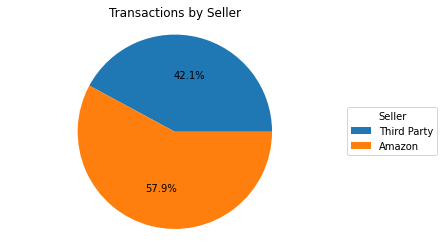

In [45]:
fig, ax = plt.subplots()
ax.pie(df_TransSeller.values, autopct = '%1.1f%%')
ax.legend(
    #df_TransSeller.index,
    title = 'Seller',
    labels = ['Third Party', 'Amazon'],
    loc = 'center left',
    bbox_to_anchor = (1,0,0.5,1)
)
ax.set_title('Transactions by Seller')
ax.axis('equal')
plt.show()
#ax.figure.savefig('./img/TransactionsBySeller.png', bbox_inches='tight', dpi=150)

In [46]:
# Purchases by Seller

df_PurchasesSeller = df[['Seller', 'ItemTotal']]
df_PurchasesSeller = df_PurchasesSeller.groupby(df_PurchasesSeller['Seller'] == 'Amazon')
df_PurchasesSeller = df_PurchasesSeller['ItemTotal'].sum()
df_PurchasesSeller

Seller
False     7575.08
True     22782.33
Name: ItemTotal, dtype: float64

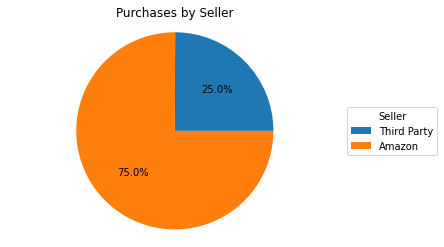

In [47]:
fig,ax = plt.subplots()
ax.pie(df_PurchasesSeller.values, autopct = '%1.1f%%')
ax.legend(
    #df_PurchasesSeller.index,
    title = 'Seller',
    labels = ['Third Party', 'Amazon'],
    loc = 'center left',
    bbox_to_anchor = (1,0,0.5,1)    
)
ax.set_title('Purchases by Seller')
ax.axis('equal')
plt.show()
#ax.figure.savefig('./img/PurchasesBySeller.png', bbox_inches='tight', dpi=150)

In [48]:
# Purchases by Category
# Note: it is necessary to sort by reverse in the df so the plot can be arranged alphabetically
# from top to bottom

df_CategoryTotal = df[['Category', 'ItemTotal']]
df_CategoryTotal = df_CategoryTotal.groupby('Category')
df_CategoryTotal = df_CategoryTotal['ItemTotal'].sum()
df_CategoryTotal = df_CategoryTotal.sort_index(ascending = False)
df_CategoryTotal

Category
UNKNOWN            2092.30
TOOLS               533.80
SPORTS_OUTDOOR      831.09
OTHER               842.15
OFFICE              504.44
HOME               2215.82
HEALTH_BEAUTY      3059.04
GROCERY             481.91
GIFT_CARD           638.92
ENTERTAINMENT        61.16
ELECTRONICS        4208.20
COMPUTER          10519.35
BOOKS              1519.07
APPAREL            2850.16
Name: ItemTotal, dtype: float64

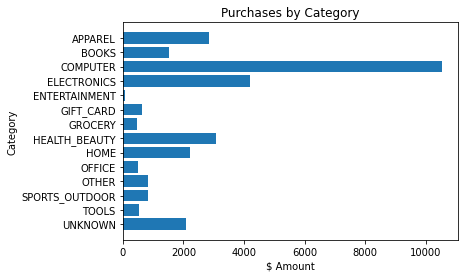

In [49]:
# Plot purchases by category

fig,ax = plt.subplots()
ax.barh(df_CategoryTotal.index, df_CategoryTotal.values)
ax.set_xlabel('$ Amount')
ax.set_ylabel('Category')
ax.set_title('Purchases by Category')
plt.show()
#ax.figure.savefig('./img/PurchasesByCategory.png', bbox_inches='tight', dpi=150)

In [50]:
# Purchases by category share

df_CategoryShare = df[['Category', 'ItemTotal']]
df_CategoryShare = df_CategoryShare.groupby('Category', as_index = False)
df_CategoryShare = df_CategoryShare['ItemTotal'].sum()
df_CategoryShare['Share'] = df_CategoryShare['ItemTotal'].div(df_CategoryShare['ItemTotal'].sum())*100
df_CategoryShare = df_CategoryShare.sort_values('Category', ascending = False)
df_CategoryShare

,Category,ItemTotal,Share
13,UNKNOWN,2092.30,6.892222
12,TOOLS,533.80,1.758385
11,SPORTS_OUTDOOR,831.09,2.737684
10,OTHER,842.15,2.774117
9,OFFICE,504.44,1.661670
8,HOME,2215.82,7.299108
7,HEALTH_BEAUTY,3059.04,10.076749
6,GROCERY,481.91,1.587454
5,GIFT_CARD,638.92,2.104659
4,ENTERTAINMENT,61.16,0.201466


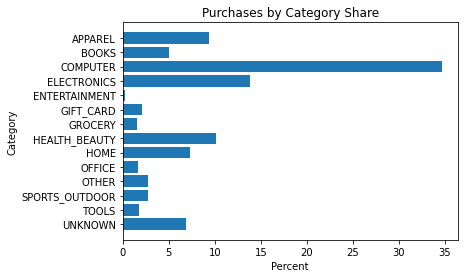

In [51]:
# Plot purchases by category share

fig,ax = plt.subplots()
ax.barh(df_CategoryShare['Category'],df_CategoryShare['Share'])
ax.set_xlabel('Percent')
ax.set_ylabel('Category')
ax.set_title('Purchases by Category Share')
plt.show()
ax.figure.savefig('./img/PurchasesByCategoryShare.png', bbox_inches='tight', dpi=150)

In [52]:
# Purchases by day of week

df_DayPur = df[['OrderDayIndex','OrderDayName','ItemTotal']]
df_DayPur = df_DayPur.groupby(['OrderDayName','OrderDayIndex'], as_index = False)
df_DayPur = df_DayPur['ItemTotal'].sum()
df_DayPur = df_DayPur.sort_values('OrderDayIndex')
df_DayPur

,OrderDayName,OrderDayIndex,ItemTotal
1,Monday,0,6787.06
5,Tuesday,1,4378.23
6,Wednesday,2,3476.16
4,Thursday,3,4260.84
0,Friday,4,4073.42
2,Saturday,5,2965.26
3,Sunday,6,4416.44


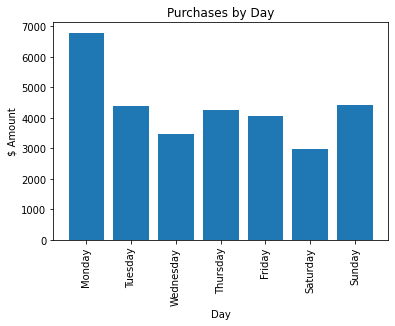

In [53]:
# Plot purchases by day of week

fig,ax = plt.subplots()
ax.bar(df_DayPur['OrderDayName'],df_DayPur['ItemTotal'])
ax.set_xlabel('Day')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Day')
plt.xticks(rotation = 90)
plt.show()
#ax.figure.savefig('./img/PurchasesByDay.png', bbox_inches='tight', dpi=150)

In [54]:
# Avg transaction value by year

df_YearAvgTrans = df[['OrderYear','ItemTotal']]
df_YearAvgTrans = df_YearAvgTrans.groupby(['OrderYear'], as_index = False)
df_YearAvgTrans = df_YearAvgTrans['ItemTotal'].sum()
df_YearAvgTrans

,OrderYear,ItemTotal
0,2008,117.09
1,2009,456.85
2,2010,2421.77
3,2011,7176.93
4,2012,3651.85
5,2013,3689.19
6,2014,2075.99
7,2015,1257.52
8,2016,823.48
9,2017,1392.77


In [55]:
df_NumTransYear = df[['OrderYear', 'OrderID']].groupby('OrderYear').size()
df_NumTransYear

OrderYear
2008      9
2009     15
2010     83
2011     96
2012     96
2013     89
2014     48
2015     59
2016     36
2017     68
2018     69
2019    113
dtype: int64

In [56]:
df_YearAvgTrans['Trans'] = df_NumTransYear.values
df_YearAvgTrans

,OrderYear,ItemTotal,Trans
0,2008,117.09,9
1,2009,456.85,15
2,2010,2421.77,83
3,2011,7176.93,96
4,2012,3651.85,96
5,2013,3689.19,89
6,2014,2075.99,48
7,2015,1257.52,59
8,2016,823.48,36
9,2017,1392.77,68


In [57]:
df_YearAvgTrans['AvgPerTrans'] = df_YearAvgTrans['ItemTotal'].div(df_YearAvgTrans['Trans'])
df_YearAvgTrans

,OrderYear,ItemTotal,Trans,AvgPerTrans
0,2008,117.09,9,13.010000
1,2009,456.85,15,30.456667
2,2010,2421.77,83,29.177952
3,2011,7176.93,96,74.759687
4,2012,3651.85,96,38.040104
5,2013,3689.19,89,41.451573
6,2014,2075.99,48,43.249792
7,2015,1257.52,59,21.313898
8,2016,823.48,36,22.874444
9,2017,1392.77,68,20.481912


In [58]:
# All of the above can be done more quickly using the following:

#df_YearAvgTrans = df[['OrderYear','ItemTotal']]
#df_YearAvgTrans = df_YearAvgTrans.groupby(['OrderYear'], as_index = False)['ItemTotal'].sum()

#df_YearOrders = df[['OrderYear','ItemTotal']].groupby('OrderYear')['ItemTotal'].size()
#df_YearAvgTrans['Trans'] = df_YearOrders.values

#df_YearAvgTrans['AvgTrans'] = df_YearAvgTrans['ItemTotal'].div(df_YearAvgTrans['Trans'])
#df_YearAvgTrans

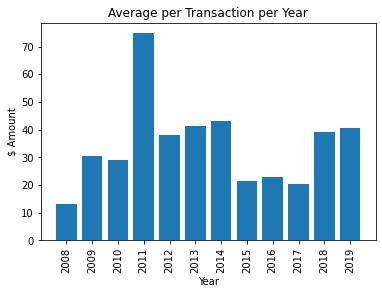

In [59]:
# Plot average per transaction by year

fig, ax = plt.subplots()
ax.bar(df_YearAvgTrans['OrderYear'],df_YearAvgTrans['AvgPerTrans'])
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Average per Transaction per Year')
plt.xticks([x for x in df_YearAvgTrans['OrderYear']], rotation = 90)
plt.show()
#ax.figure.savefig('./img/AveragePerTransPerYear.png', bbox_inches='tight', dpi=150)

In [60]:
# Shipping method

df_Carriers = df['Carrier']
CarrierVC = df_Carriers.value_counts()
CarrierVC = CarrierVC.sort_index(ascending = False)
CarrierVC

USPS                    273
UPS Mail Innovations      5
UPS                     170
Other                    98
FedEx SmartPost           4
FedEx                    22
DHL                       9
AMZN                    200
Name: Carrier, dtype: int64

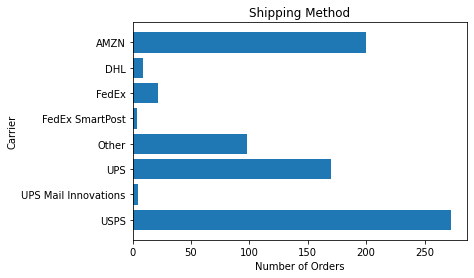

In [61]:
# Plot of shipping method

fig,ax = plt.subplots()
ax.barh(CarrierVC.index, CarrierVC.values)
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Carrier')
ax.set_title('Shipping Method')
plt.show()
#ax.figure.savefig('./img/ShippingMethod.png', bbox_inches='tight', dpi=150)

In [62]:
# Shipping method and avg transaction cost

df_CarrierTotal = df[['Carrier', 'ItemTotal']]
df_CarrierTotal = df_CarrierTotal.groupby('Carrier', as_index = False)['ItemTotal'].sum()

df_CarrierTrans = df[['Carrier', 'ItemTotal']].groupby('Carrier')['ItemTotal'].size()
df_CarrierTotal['NumTrans'] = df_CarrierTrans.values

df_CarrierTotal['AvgPerTrans'] = df_CarrierTotal['ItemTotal'].div(df_CarrierTotal['NumTrans']).round(2)

df_CarrierTotal = df_CarrierTotal.sort_values('Carrier', ascending = False)
df_CarrierTotal

,Carrier,ItemTotal,NumTrans,AvgPerTrans
7,USPS,6594.03,273,24.15
6,UPS Mail Innovations,57.62,5,11.52
5,UPS,10874.11,170,63.97
4,Other,4113.09,98,41.97
3,FedEx SmartPost,100.26,4,25.06
2,FedEx,1948.20,22,88.55
1,DHL,89.71,9,9.97
0,AMZN,6580.39,200,32.90


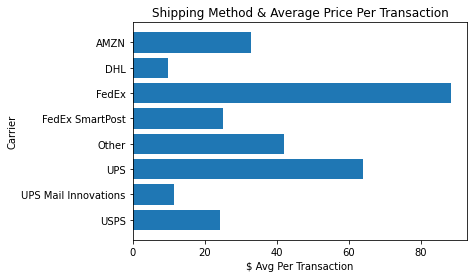

In [63]:
# Plot shipping method and avg transaction cost

fig,ax = plt.subplots()
ax.barh(df_CarrierTotal['Carrier'], df_CarrierTotal['AvgPerTrans'])
ax.set_xlabel('$ Avg Per Transaction')
ax.set_ylabel('Carrier')
ax.set_title('Shipping Method & Average Price Per Transaction')
plt.show()
#ax.figure.savefig('./img/ShippingMethodPrice.png', bbox_inches='tight', dpi=150)

## <a id='section3'>3. Connecting to SQL</a>

<a href='#home'>Home</a>

In [64]:
# Export df to csv without index
# We will use this csv to import data into MySQL

df.to_csv('amazon_purchases_2.csv', index=False)

In [65]:
# dotenv allows us to save passwords in a .env file

from dotenv import load_dotenv

In [66]:
dotenv_local_path = './.env'
load_dotenv(dotenv_path=dotenv_local_path, verbose=True) 

True

In [67]:
%load_ext dotenv
%dotenv

In [68]:
# sqlalchemy allows us to interact with SQL using Python

import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('mysql+pymysql://' + os.environ.get("MYSQL_USER") + ":" + os.environ.get("MYSQL_PASSWORD") + '@localhost:3306/amazon')

In [69]:
# Note that Condition must be wrapped in special characters like backticks since Condition is a reserved SQL keyword.

engine.execute('DROP TABLE IF EXISTS purchases;')

engine.execute("""CREATE TABLE IF NOT EXISTS purchases (
OrderID int not null primary key,
OrderDate date,
Category varchar(50),
`Condition` varchar(50),
Seller varchar(50),
ListPricePerUnit numeric(10,2),
PurchasePricePerUnit numeric(10,2),
Quantity int,
ShipDate date,
Carrier varchar(50),
ItemSubtotal numeric(10,2),
Tax numeric(10,2),
ItemTotal numeric(10,2),
OrderYear int,
OrderMonth int,
OrderDay int,
OrderDayIndex int,
OrderDayName varchar(50));""")

In [70]:
tables = engine.execute('SHOW TABLES')
tables

In [71]:
tables = [x for x in tables]
tables

[('purchases',),
 ('purchases2',),
 ('purchases_airflow',),
 ('purchases_airflow_aws',)]

In [72]:
# Required to parse csv to form insert statements

import csv
from sqlalchemy.sql import text

In [73]:
# Insert rows from amazon_purchases_2.csv into MySQL

with open('amazon_purchases_2.csv') as csv_file:
    input_file = csv.reader(csv_file, delimiter = ',')
    next(input_file) # skip header
    for row in input_file:
        s = text("""
            INSERT IGNORE INTO purchases (
            OrderID,
            OrderDate,
            Category,
            `Condition`,
            Seller,
            ListPricePerUnit,
            PurchasePricePerUnit,
            Quantity,
            ShipDate,
            Carrier,
            ItemSubtotal,
            Tax,
            ItemTotal,
            OrderYear,
            OrderMonth,
            OrderDay,
            OrderDayIndex,
            OrderDayName
            ) VALUES (
            :OrderID,
            :OrderDate,
            :Category,
            :Condition,
            :Seller,
            :ListPricePerUnit,
            :PurchasePricePerUnit,
            :Quantity,
            :ShipDate,
            :Carrier,
            :ItemSubtotal,
            :Tax,
            :ItemTotal,
            :OrderYear,
            :OrderMonth,
            :OrderDay,
            :OrderDayIndex,
            :OrderDayName
            );
        """)
        engine.execute(
        s,
        OrderID = row[0],
        OrderDate = row[1],
        Category = row[2],
        Condition = row[3],
        Seller = row[4],
        ListPricePerUnit = row[5],
        PurchasePricePerUnit = row[6],
        Quantity = row[7],
        ShipDate = row[8],
        Carrier = row[9],
        ItemSubtotal = row[10],
        Tax = row[11],
        ItemTotal = row[12],
        OrderYear = row[13],
        OrderMonth = row[14],
        OrderDay = row[15],
        OrderDayIndex = row[16],
        OrderDayName = row[17]
        )

In [74]:
# Confirm data was populated correctly 

#purchases = engine.execute('select * from purchases')
#for i in purchases:
#    print(i)

In [75]:
# Create dataframe from MySQL table

df_purchases = pd.read_sql("SELECT * FROM purchases", con=engine, parse_dates = ['OrderDate', 'ShipDate'])
df_purchases.head()

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay,OrderDayIndex,OrderDayName
0,1,2008-02-19,BOOKS,unknown,Amazon,29.99,19.79,1,2008-02-25,USPS,19.79,0.0,19.79,2008,2,19,1,Tuesday
1,2,2008-02-19,BOOKS,unknown,Amazon,27.95,18.45,1,2008-02-25,USPS,18.45,0.0,18.45,2008,2,19,1,Tuesday
2,3,2008-06-03,BOOKS,unknown,Amazon,34.99,23.09,1,2008-06-04,UPS,23.09,0.0,23.09,2008,6,3,1,Tuesday
3,4,2008-11-06,HEALTH_BEAUTY,unknown,ThirdParty,6.99,9.39,1,2008-11-07,USPS,9.39,0.0,9.39,2008,11,6,3,Thursday
4,5,2008-11-06,HEALTH_BEAUTY,unknown,ThirdParty,10.99,7.99,1,2008-11-07,USPS,7.99,0.0,7.99,2008,11,6,3,Thursday


In [76]:
df_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OrderID               781 non-null    int64         
 1   OrderDate             781 non-null    datetime64[ns]
 2   Category              781 non-null    object        
 3   Condition             781 non-null    object        
 4   Seller                781 non-null    object        
 5   ListPricePerUnit      781 non-null    float64       
 6   PurchasePricePerUnit  781 non-null    float64       
 7   Quantity              781 non-null    int64         
 8   ShipDate              781 non-null    datetime64[ns]
 9   Carrier               781 non-null    object        
 10  ItemSubtotal          781 non-null    float64       
 11  Tax                   781 non-null    float64       
 12  ItemTotal             781 non-null    float64       
 13  OrderYear           

## <a id='section4'>4. Data Analysis Using SQL</a>

<a href='#home'>Home</a>

In [77]:
# Cumulative total spent from 2008-2019, inclusive

TotalSpent = engine.execute('SELECT SUM(ItemTotal) FROM purchases')
TotalSpent = [row for row in TotalSpent]
for i in TotalSpent[0]: print(i)

30357.41


In [78]:
# Total number of transactions

TotalTrans = engine.execute('SELECT COUNT(*) FROM purchases')
TotalTrans = [row for row in TotalTrans]
for i in TotalTrans[0]: print(i)

781


In [79]:
# Average spent

AverageSpent = 30357.41/781
AverageSpent

38.86992317541613

In [80]:
# Use groupby to sum purchases by date

OrderDate_ItemTotal = engine.execute('SELECT OrderDate, sum(ItemTotal) FROM purchases GROUP BY OrderDate')
OrderDate_ItemTotal = [row for row in OrderDate_ItemTotal]
df_OrderDate_ItemTotal = pd.DataFrame.from_records(OrderDate_ItemTotal)
df_OrderDate_ItemTotal.columns = ['OrderDate', 'ItemTotal']
df_OrderDate_ItemTotal

,OrderDate,ItemTotal
0,2008-02-19,38.24
1,2008-06-03,23.09
2,2008-11-06,29.86
3,2008-12-13,25.90
4,2009-07-18,26.97
...,...,...
440,2019-12-13,23.45
441,2019-12-14,23.33
442,2019-12-18,28.77
443,2019-12-19,200.00


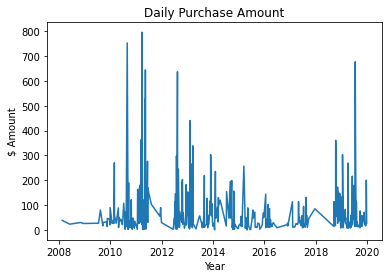

In [81]:
# Plot OrderDate & sum of purchases by date

fig, ax = plt.subplots()
ax.plot(df_OrderDate_ItemTotal['OrderDate'], df_OrderDate_ItemTotal['ItemTotal'])
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Daily Purchase Amount')
plt.show()

In [82]:
# Purchases by year 

OrderYear_ItemTotal = engine.execute('SELECT OrderYear, SUM(ItemTotal) FROM purchases GROUP BY OrderYear')
OrderYear_ItemTotal = [row for row in OrderYear_ItemTotal]
df_OrderYear_ItemTotal = pd.DataFrame.from_records(OrderYear_ItemTotal)
df_OrderYear_ItemTotal.columns = ['OrderYear', 'SumItemTotal']
df_OrderYear_ItemTotal

,OrderYear,SumItemTotal
0,2008,117.09
1,2009,456.85
2,2010,2421.77
3,2011,7176.93
4,2012,3651.85
5,2013,3689.19
6,2014,2075.99
7,2015,1257.52
8,2016,823.48
9,2017,1392.77


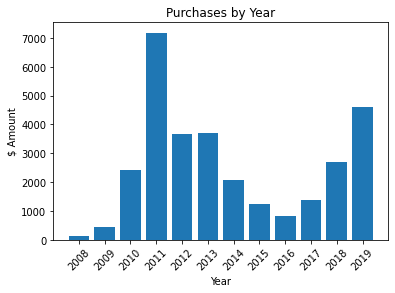

In [83]:
# Plot purchases by year

fig,ax = plt.subplots()
ax.bar(df_OrderYear_ItemTotal['OrderYear'], df_OrderYear_ItemTotal['SumItemTotal'])
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Year')
plt.xticks([x for x in df_OrderYear_ItemTotal['OrderYear']], rotation = 45)
plt.show()

In [84]:
# Instead of saving df to amazon_purchases_2.csv, we can save df directly to sql

df.to_sql('purchases2', con=engine, if_exists = 'replace', index=False)

In [85]:
# Query data directly from sql

# engine.execute("SELECT * FROM purchases2").fetchall()

<a href='#home'>Home</a>